<a href="https://colab.research.google.com/github/Gm-shuvo/AI_Lab/blob/main/digitHandWrittenPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = X_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = X_test.reshape((10000, 28, 28, 1)) / 255.0

y_train = keras.utils.to_categorical(Y_train, 10)
y_test = keras.utils.to_categorical(Y_test, 10)



In [ ]:
x_train_flat = x_train.astype("float32") / 255.0
x_test_flat = x_test.astype("float32") / 255.0

(60000, 28, 28, 1)

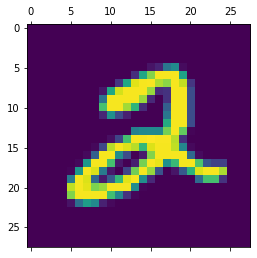

In [ ]:
plt.matshow(x_train_flat[5])
x_train_flat.shape

Number of images without augmentation:  60000


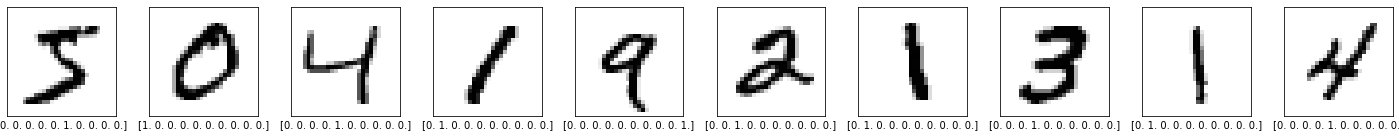

In [ ]:
fig = plt.figure(figsize=(25, 2))
print("Number of images without augmentation: ",x_train_flat.shape[0])
for i, image in enumerate(x_train_flat[:10]):
    # Create a new subplot for each image
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(y_train[i])


plt.show()

In [ ]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape =(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
history = model.fit(x_train_flat, y_train, batch_size=128, epochs=20, verbose = 2)

Epoch 1/20
469/469 - 2s - loss: 1.2185 - accuracy: 0.5986 - 2s/epoch - 5ms/step
Epoch 2/20
469/469 - 1s - loss: 0.5162 - accuracy: 0.8452 - 1s/epoch - 3ms/step
Epoch 3/20
469/469 - 2s - loss: 0.4126 - accuracy: 0.8779 - 2s/epoch - 4ms/step
Epoch 4/20
469/469 - 1s - loss: 0.3738 - accuracy: 0.8901 - 1s/epoch - 3ms/step
Epoch 5/20
469/469 - 1s - loss: 0.3462 - accuracy: 0.8985 - 1s/epoch - 3ms/step
Epoch 6/20
469/469 - 1s - loss: 0.3201 - accuracy: 0.9069 - 1s/epoch - 3ms/step
Epoch 7/20
469/469 - 1s - loss: 0.2921 - accuracy: 0.9159 - 1s/epoch - 3ms/step
Epoch 8/20
469/469 - 1s - loss: 0.2683 - accuracy: 0.9226 - 1s/epoch - 3ms/step
Epoch 9/20
469/469 - 1s - loss: 0.2459 - accuracy: 0.9287 - 1s/epoch - 3ms/step
Epoch 10/20
469/469 - 1s - loss: 0.2242 - accuracy: 0.9353 - 1s/epoch - 3ms/step
Epoch 11/20
469/469 - 2s - loss: 0.2055 - accuracy: 0.9403 - 2s/epoch - 3ms/step
Epoch 12/20
469/469 - 2s - loss: 0.1885 - accuracy: 0.9451 - 2s/epoch - 4ms/step
Epoch 13/20
469/469 - 1s - loss: 0.17

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 26.4506 - accuracy: 0.9114


[26.450584411621094, 0.9114000201225281]

In [ ]:
#Augmentation of dataset
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode = 'nearest'
)


In [ ]:
datagen.fit(x_train_flat)

augment_image = []

for batch in datagen.flow(x_train, batch_size=len(x_train_flat), shuffle=False):
  augment_image.append(batch)
  if len(augment_image) * len(batch) >= len(x_train_flat) * 2:
    break;
augment_image = np.concatenate(augment_image)
y_train_augment = np.concatenate((y_train, y_train), axis = 0)



Number of images with augmentation:  120000


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


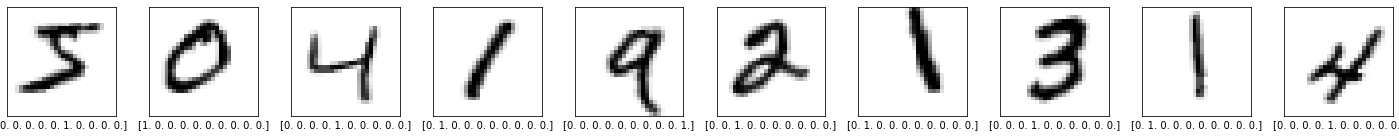

In [ ]:
fig = plt.figure(figsize=(25, 2))
print("Number of images with augmentation: ",augment_image.shape[0])
for i, image in enumerate(augment_image[:10]):
    # Create a new subplot for each image
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(y_train[i])


plt.show()

In [ ]:
model.fit(augment_image, y_train_augment, epochs=20, batch_size=128, verbose = 2)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(augment_image.shape)
print('Test accuracy after augmentation ( with normal test_data):', test_acc)

Epoch 1/20
938/938 - 3s - loss: 4.8965 - accuracy: 0.6125 - 3s/epoch - 3ms/step
Epoch 2/20
938/938 - 3s - loss: 0.6593 - accuracy: 0.8016 - 3s/epoch - 3ms/step
Epoch 3/20
938/938 - 3s - loss: 0.5088 - accuracy: 0.8449 - 3s/epoch - 3ms/step
Epoch 4/20
938/938 - 3s - loss: 0.4312 - accuracy: 0.8691 - 3s/epoch - 3ms/step
Epoch 5/20
938/938 - 2s - loss: 0.3696 - accuracy: 0.8874 - 2s/epoch - 3ms/step
Epoch 6/20
938/938 - 3s - loss: 0.3201 - accuracy: 0.9021 - 3s/epoch - 3ms/step
Epoch 7/20
938/938 - 3s - loss: 0.2816 - accuracy: 0.9145 - 3s/epoch - 3ms/step
Epoch 8/20
938/938 - 2s - loss: 0.2488 - accuracy: 0.9246 - 2s/epoch - 3ms/step
Epoch 9/20
938/938 - 3s - loss: 0.2237 - accuracy: 0.9323 - 3s/epoch - 3ms/step
Epoch 10/20
938/938 - 3s - loss: 0.2016 - accuracy: 0.9381 - 3s/epoch - 3ms/step
Epoch 11/20
938/938 - 3s - loss: 0.1829 - accuracy: 0.9446 - 3s/epoch - 3ms/step
Epoch 12/20
938/938 - 3s - loss: 0.1668 - accuracy: 0.9489 - 3s/epoch - 3ms/step
Epoch 13/20
938/938 - 3s - loss: 0.15

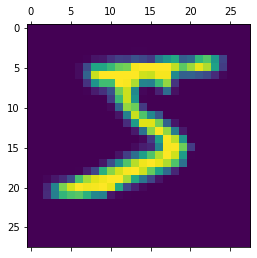

In [ ]:
plt.matshow(augment_image[0]) 

In [ ]:
predictions = model.predict(augment_image)


3750/3750 [==============================] - 5s 1ms/step


In [ ]:
np.argmax(predictions[7])

3